In [2]:
import networkx as nx
import numpy.random as ra
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

100%|██████████| 498/498 [00:31<00:00, 15.71it/s]


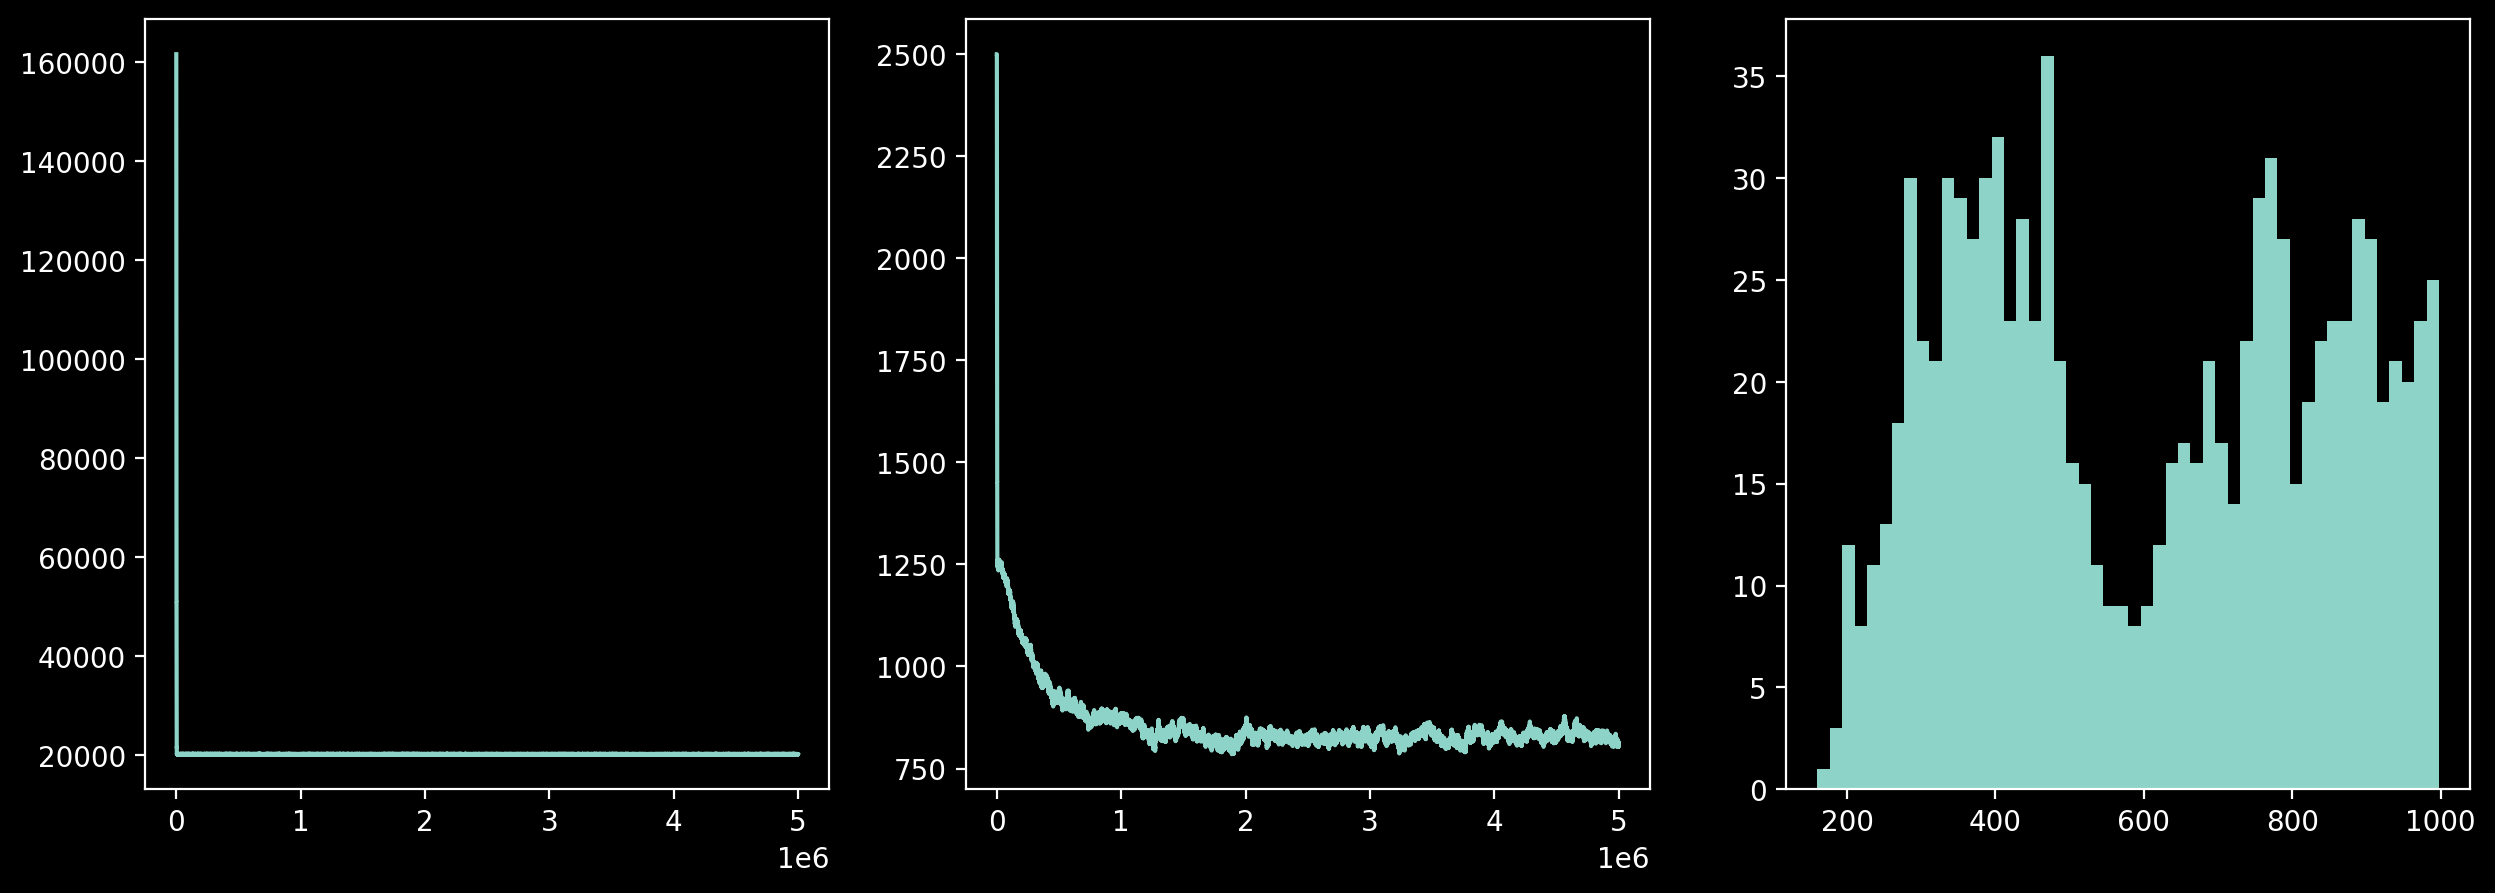

In [3]:
n = 100
p = 0.05
r = 0.5

nchoose3 = n*(n-1)*(n-2)/6

G = nx.complete_graph(n)
tcount = nchoose3
cutsize = (n//2) * (n//2)
tcounts = []
cutsizes = []
graphs = []

for i in tqdm(range(5000000)):
    u = ra.randint(n)
    v = ra.randint(n)
    while v == u:
        v = ra.randint(n)
    
    if ra.random() < p:
        if not G.has_edge(u,v):
            G.add_edge(u,v)
            tcount += len(list(nx.common_neighbors(G,u,v)))
            if u < n//2 and v >= n//2 or u >= n//2 and v < n//2:
                cutsize += 1
    elif G.has_edge(u,v):
        newtcount = tcount
        newtcount -= len(list(nx.common_neighbors(G,u,v)))
                
        if newtcount >= nchoose3 * r**3:
            G.remove_edge(u,v)
            tcount = newtcount
            if u < n//2 and v >= n//2 or u >= n//2 and v < n//2:
                cutsize -= 1
            
    tcounts.append(tcount)
    cutsizes.append(cutsize)
    
    if i % 10000 == 0 and i > 10000:
        graphs.append(G.copy())

def overlap(G,H):
    o = 0
    for u in range(n):
        for v in range(u):
            if G.has_edge(u,v) ^ H.has_edge(u,v):
                o -= 1
            else:
                o += 1
    return o / 2
        
fig, ax = plt.subplots(1,3, figsize=(15,5))
_=ax[0].plot(tcounts)
_=ax[1].plot(cutsizes)

ns = list(range(len(graphs)))
overlaps = [ overlap(graphs[i],graphs[ra.choice(ns)]) for i in tqdm(range(len(graphs))) for j in range(50) ]
overlaps = np.array(overlaps)
_=ax[2].hist(overlaps[np.abs(overlaps) < 1000], bins=50)


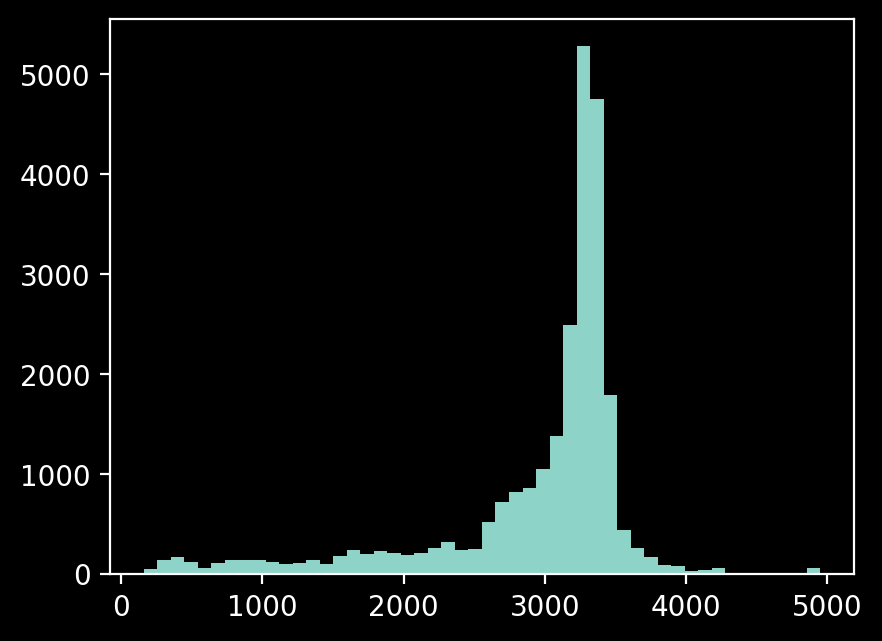

In [5]:
_=plt.hist(overlaps, bins=50)

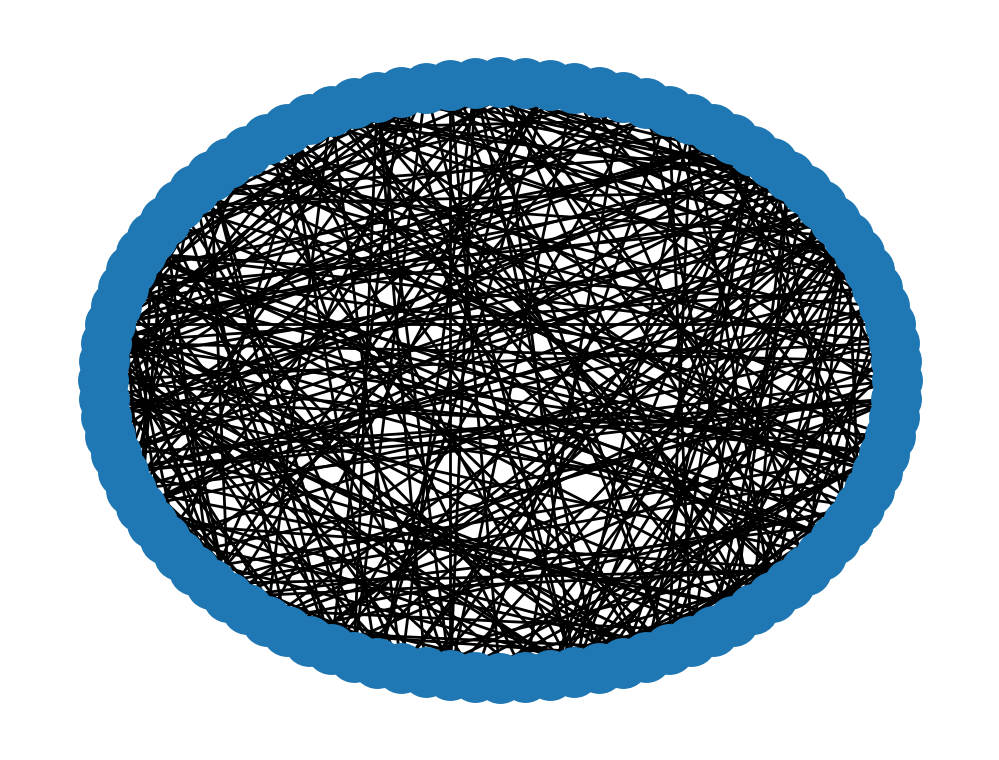

In [16]:
nx.draw_circular(nx.difference(graphs[400], graphs[450]))

In [19]:
2*(0.5) - 1

0.5874010519681996

In [ ]:
0.25 